## Import Packages

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [38]:
from scipy.stats import norm
from scipy import stats

## Import Data

In [4]:
dallasData = pd.read_csv("C:/Users/Admin/Documents/Notebooks/df_Dallas.csv")

## Data Wrangling

In [7]:
dallasData.columns

Index(['Animal Id', 'Animal Type', 'Animal Breed', 'Kennel Number',
       'Kennel Status', 'Source Id', 'Intake Type', 'Intake Subtype',
       'Intake Total', 'Reason', 'Staff Id', 'Intake Date', 'Intake Time',
       'Due Out', 'Intake Condition', 'Outcome Type', 'Outcome Subtype',
       'Outcome Date', 'Outcome Time', 'Impound Number', 'Outcome Condition',
       'Month', 'Year'],
      dtype='object')

In [13]:
dallasData['Intake Date'] = pd.to_datetime(dallasData['Intake Date'])

In [18]:
dallasData['year'] = dallasData['Intake Date'].dt.year
dallasData['month'] = dallasData['Intake Date'].dt.month
dallasData['dayofweek'] = dallasData['Intake Date'].dt.dayofweek
dallasData['week'] = dallasData['Intake Date'].dt.isocalendar().week

In [25]:
pd.set_option("display.max_columns",None)

In [37]:
dallasData

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Source Id,Intake Type,Intake Subtype,Intake Total,Reason,Staff Id,Intake Date,Intake Time,Due Out,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Impound Number,Outcome Condition,Month,Year,year,month,dayofweek,week,Outcome Type Recoded
0,A1093869,CAT,ABYSSINIAN,FOUND,IMPOUNDED,P0916032,STRAY,WEB,1,NaN,WEB,2020-01-21,12:25:00,1/21/2020,NORMAL,FOUND EXP,OTHER,2/21/2020,0:00:00,K20-495021,NaN,JAN.2020,FY2020,2020,1,1,4,False
1,A1092513,CAT,ABYSSINIAN,LOST,IMPOUNDED,P0914189,STRAY,WEB,1,NaN,WEB,2020-01-03,13:25:00,1/4/2020,NORMAL,LOST EXP,OTHER,2/4/2020,0:00:00,K20-493070,NaN,JAN.2020,FY2020,2020,1,4,1,False
2,A1004406,CAT,AMER CURL SH,QC 07,LAB,P9991765,STRAY,AT LARGE,1,OTHRINTAKS,RK1765,2019-11-13,15:51:00,11/23/2019,APP WNL,EUTHANIZED,BITE,11/28/2019,11:09:00,K19-487350,APP WNL,NOV.2019,FY2020,2019,11,2,46,True
3,A1105658,CAT,AMER CURL SH,LOST,IMPOUNDED,P0934494,STRAY,WEB,1,NaN,WEB,2020-07-29,13:25:00,8/8/2020,NORMAL,LOST EXP,OTHER,9/8/2020,0:00:00,K20-510672,NaN,JUL.2020,FY2020,2020,7,2,31,False
4,A1106175,CAT,AMER CURL SH,LOST,IMPOUNDED,P0935441,STRAY,WEB,1,NaN,WEB,2020-07-28,15:25:00,8/21/2020,NORMAL,LOST EXP,OTHER,9/21/2020,0:00:00,K20-511379,NaN,JUL.2020,FY2020,2020,7,1,31,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30575,A1088204,DOG,YORKSHIRE TERR,CC 12,UNAVAILABLE,P0876335,TRANSFER,SURGERY,1,MEDICAL,CW,2019-12-14,7:36:00,12/14/2019,APP WNL,TRANSFER,SURGERY,12/14/2019,16:56:00,K19-490794,APP WNL,DEC.2019,FY2020,2019,12,5,50,False
30576,A1088866,DOG,YORKSHIRE TERR,LFSD 17,UNAVAILABLE,P0908955,OWNER SURRENDER,RETURN30,1,MEDICAL,BW,2019-11-26,11:49:00,11/26/2019,APP WNL,TRANSFER,MEDICAL-CONTAGIOUS,11/27/2019,14:32:00,K19-488896,APP SICK,NOV.2019,FY2020,2019,11,1,48,False
30577,A1088867,DOG,YORKSHIRE TERR,LFSD 17,UNAVAILABLE,P0908955,OWNER SURRENDER,RETURN30,1,MEDICAL,BW,2019-11-26,11:53:00,11/26/2019,APP WNL,TRANSFER,MEDICAL-CONTAGIOUS,11/27/2019,14:32:00,K19-488897,APP SICK,NOV.2019,FY2020,2019,11,1,48,False
30578,A1089272,DOG,YORKSHIRE TERR,CC 09,AVAILABLE,P0909010,STRAY,AT LARGE,1,OTHRINTAKS,CDM,2019-11-24,10:05:00,11/28/2019,APP INJ,TRANSFER,MEDICAL-CONTAGIOUS,12/2/2019,15:42:00,K19-488645,APP INJ,NOV.2019,FY2020,2019,11,6,47,False


In [29]:
dallasData['Outcome Type'].unique()

array(['FOUND EXP', 'LOST EXP', 'EUTHANIZED', 'ADOPTION',
       'DEAD ON ARRIVAL', 'FOSTER', 'OTHER', 'TRANSFER',
       'RETURNED TO OWNER', 'DIED', 'TREATMENT', 'DISPOSAL', 'MISSING'],
      dtype=object)

In [31]:
def outcome_recode(series):
    if series ==  'EUTHANIZED':
        return True
    else:
        return False

In [32]:
dallasData['Outcome Type Recoded'] = dallasData['Outcome Type'].apply(outcome_recode)

In [33]:
dallasData['Outcome Type Recoded']

0        False
1        False
2         True
3        False
4        False
         ...  
30575    False
30576    False
30577    False
30578    False
30579    False
Name: Outcome Type Recoded, Length: 30580, dtype: bool

In [34]:
dallasData.to_csv("DallasDataNew.csv")

## Data Analysis

### Simple T-Test to see if the day of the week mattered for Intake

<AxesSubplot:>

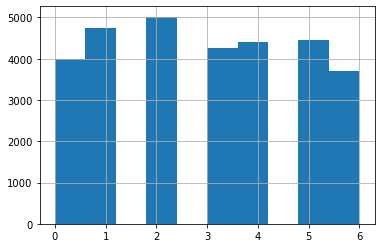

In [41]:
dallasData['dayofweek'].hist() #To check for normal distribution

Wednesday has the highest # of Intakes

In [42]:
stats.ttest_1samp(dallasData['dayofweek'], 2)     #Single Sample T-Test results, 

Ttest_1sampResult(statistic=83.92066650087406, pvalue=0.0)

In [46]:
dallasData.dayofweek.mean() ## If Monday is 0 and Sunday is 6 the Population Mean is closer to Thursday or 3.

2.932177894048398

### Independent Chi Square

Create a Contingency Table

In [43]:
dallasData_crosstab = pd.crosstab(dallasData['Animal Type'], dallasData['Intake Type'])

In [44]:
dallasData_crosstab     #Animal Type and Intake Type

Intake Type,CONFISCATED,DISPOS REQ,FOSTER,KEEPSAFE,OWNER SURRENDER,STRAY,TRANSFER,TREATMENT
Animal Type,,,,,,,,
CAT,162,17,2191,22,1198,3991,146,509
DOG,1063,18,1215,112,4494,13786,294,1362


In [45]:
stats.chi2_contingency(dallasData_crosstab) 

(2843.620080659314,
 0.0,
 7,
 array([[3.29924787e+02, 9.42642250e+00, 9.17325572e+02, 3.60897319e+01,
         1.53300562e+03, 4.78781465e+03, 1.18503597e+02, 5.03909614e+02],
        [8.95075213e+02, 2.55735775e+01, 2.48867443e+03, 9.79102681e+01,
         4.15899438e+03, 1.29891853e+04, 3.21496403e+02, 1.36709039e+03]]))

Chi-Square Statistic is 2844, The p-value is 0.0, so there is significant findings between the ways dogs and cats come in to Dallas Animal Control.

In [48]:
dallasData_crosstab2 = pd.crosstab(dallasData['Animal Type'], dallasData['Intake Condition'])

In [49]:
dallasData_crosstab2  ## Ignore the cells with <5 

Intake Condition,APP INJ,APP SICK,APP WNL,CRITICAL,DEAD,DECEASED,FATAL,HEALTHY,NORMAL,TREATABLE MANAGEABLE CONTAGIOUS,TREATABLE MANAGEABLE NON-CONTAGIOUS,TREATABLE REHABILITABLE CONTAGIOUS,TREATABLE REHABILITABLE NON-CONTAGIOUS,UNDERAGE,UNHEALTHY UNTREATABLE CONTAGIOUS,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNKNOWN
Animal Type,,,,,,,,,,,,,,,,,
CAT,362,782,4307,129,58,78,8,97,402,1,40,28,936,651,1,33,323
DOG,777,679,15441,132,76,86,11,13,1709,4,38,4,2252,221,0,90,811


Independent Chi-Square Testing Of Animal Type and Intake Condition

In [50]:
stats.chi2_contingency(dallasData_crosstab2)

(2307.5422781772504,
 0.0,
 16,
 array([[3.06762721e+02, 3.93485808e+02, 5.31865690e+03, 7.02941792e+01,
         3.60897319e+01, 4.41695226e+01, 5.11720078e+00, 2.96258993e+01,
         5.68547940e+02, 1.34663179e+00, 2.10074559e+01, 8.61844343e+00,
         8.58612426e+02, 2.34852583e+02, 2.69326357e-01, 3.31271419e+01,
         3.05416089e+02],
        [8.32237279e+02, 1.06751419e+03, 1.44293431e+04, 1.90705821e+02,
         9.79102681e+01, 1.19830477e+02, 1.38827992e+01, 8.03741007e+01,
         1.54245206e+03, 3.65336821e+00, 5.69925441e+01, 2.33815566e+01,
         2.32938757e+03, 6.37147417e+02, 7.30673643e-01, 8.98728581e+01,
         8.28583911e+02]]))